In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
})

In [12]:
import pandas as pd
from pathlib import Path

In [40]:
def boxplot(ax, input_file, compute_app_eff, input_is_throughput):
    # Read in the CSV file as a Pandas DataFrame
    data = pd.read_csv(input_file, skipinitialspace=True, sep=',\s+', delimiter=',', na_values='X')
    # In the case of trailing whitespace, the X don't get converted.
    # This replaces anything starting with an X to a NaN
    data = data.replace(r'^X', np.nan, regex=True)

    # Make sure the data is all floating point
    data[list(data.columns[1:])] = data[list(data.columns[1:])].apply(pd.to_numeric)

    # Save a version where NaN is set to 0
    data_nona = data.fillna(float(0.0))

    if compute_app_eff:
        # Calculate application efficiency
        if not input_is_throughput:
            minimums = data.min(axis=1, skipna=True)
            for col in list(data.columns[1:]):
                data_nona[col] = minimums[:] / data_nona[col]
            data_nona = data_nona.replace([np.inf, -np.inf, np.nan], 0.0)
        else:
            maximums = data.max(axis=1, skipna=True)
            for col in list(data.columns[1:]):
                data_nona[col] = data_nona[col] / maximums[:] 
            data_nona = data_nona.replace([np.inf, -np.inf, np.nan], 0.0)
    else:
        for col in list(data.columns[1:]):
            data_nona[col] = data_nona[col] / 100.0
        
    
    data_nona.boxplot(ax=ax, notch=False, medianprops = dict(linestyle='-',linewidth=3.0))
    ax.set(ylabel='Efficiency')
    labels=ax.get_xticklabels()
    for i in range(len(labels)):
        if not plt.rcParams['text.usetex']:
            labels[i].set_text(labels[i].get_text().replace(r"\%", "%"))

    ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    

In [6]:
import os
csv_root = "../data/"

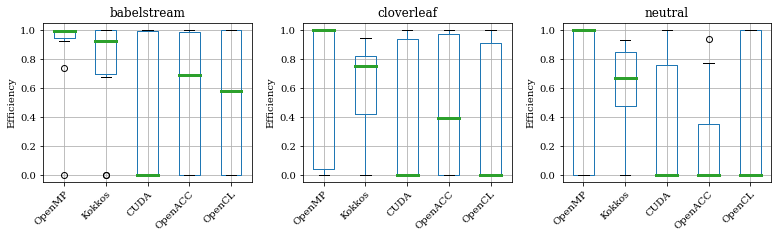

In [38]:
fig = plt.figure(figsize=(11, 3.5))
for i, appfile in enumerate(["babelstream.csv", "cloverleaf.csv", "neutral.csv"]):
    ax = fig.add_subplot(1,3,i+1)
    boxplot(ax, os.path.join(csv_root, appfile), True, "babelstream" in appfile)
    plt.title(Path(appfile).stem)
plt.tight_layout(pad=1.4,w_pad=1.5, h_pad=0.5)
plt.savefig("box_plot_tiled.pdf", bbox_inches="tight")

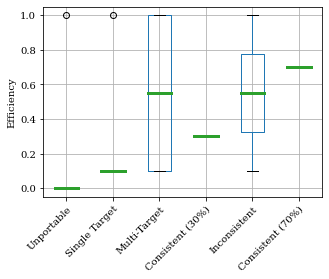

In [41]:
fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(1,1,1)
boxplot(ax, os.path.join(csv_root, "synthetic.csv"), False, False)
plt.savefig("box_plot_synthetic.pdf", bbox_inches="tight")